## **HEART ATTACK PREDICTION  MODEL**
—-----------------------------------------------------------------------------------------------------------

Name: Farisa Hameed

Organization: Entri Elevate

![Description of image](heart.jpg)


## **Overview** 
The risk of heart attacks is a significant health concern worldwide, influenced by various lifestyle factors, genetic predispositions, and health conditions. Accurate prediction of heart attack risk can play a crucial role in preventive healthcare, enabling early intervention and targeted treatment. However, predicting heart attack risk is complex due to the interplay of numerous factors, such as cholesterol levels, blood pressure, age, family history, and lifestyle habits. Therefore, developing a reliable prediction model can help in identifying individuals at high risk and guide personalized healthcare strategies.

## **Objective**
To develop an effective heart attack risk prediction model using machine learning techniques, leveraging various health and lifestyle features to classify individuals based on their likelihood of experiencing a heart attack.

## **Data Description**
The dataset contains 26 columns, including a mix of demographic, medical, and behavioral variables. Features include:

**Demographic Information:**

Age
Sex
Country
Continent
Hemisphere

**Medical and Clinical Features:**

Cholesterol
Blood Pressure
Heart Rate
Diabetes
Triglycerides
BMI (Body Mass Index)
Previous Heart Problems
Medication Use

**Lifestyle Features:**

Smoking
Obesity
Alcohol Consumption
Exercise Hours Per Week
Sedentary Hours Per Day
Sleep Hours Per Day
Stress Level

**Socioeconomic Data:**

Income

## **Target Variable:**

**Heart Attack Risk:**  Binary classification variable (0 = No risk, 1 = At risk).
The Heart Attack Risk column is selected as the target variable for the classification model. It is a binary variable (0/1), making it ideal for machine learning classification tasks.



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

In [4]:
# Data Collection 
print("\nCollecting Data...")

In [5]:
d=pd.read_csv('Heart Attack Prediction.csv')
print("\nDataset Loaded....")


Dataset Loaded....


In [6]:
data = pd.DataFrame(d)


In [7]:
data.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [8]:
data.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [10]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [11]:
# Check the shape of data
print(f'The Training Dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The Training Dataset has 8763 rows and 26 columns.


----------------

## Data Cleaning and Handling Missing Values


In [14]:
# Find any missing values
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [15]:
# Find any Duplicates
data.duplicated().sum()

0

In [16]:
data.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [17]:
# Get the cardinality of each column
cardinalities = data.nunique()

# Display cardinalities for all columns
print(cardinalities)

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [18]:
# Split the "Blood Pressure" column into two separate columns for systolic and diastolic
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric values
data['Systolic'] = pd.to_numeric(data['Systolic'])
data['Diastolic'] = pd.to_numeric(data['Diastolic'])

# Drop the original "Blood Pressure" column
data = data.drop(columns=['Blood Pressure'])

In [19]:
# Remove irrelevant columns
data.drop(columns=['Patient ID', 'Income','Continent','Hemisphere','BMI', 'Sedentary Hours Per Day' ,'Country' ], inplace=True)

In [20]:
# Check for class distribution
print(data['Heart Attack Risk'].value_counts())

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


In [21]:
data.shape

(8763, 20)

**The dataset was loaded successfully, and initial cleaning steps were performed.**

**<u>Outputs Observed<u>**

The dataset preview showed structured data with columns such as patient demographics and health metrics.  Data cleaning logs indicated preprocessing steps.

Data loading and cleaning ensured the dataset was ready for analysis by removing inconsistencies and handling null values.

----------------

## Exploratory Data Analysis (EDA)

In [25]:
# Identify Numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk', 'Systolic', 'Diastolic'],
      dtype='object')

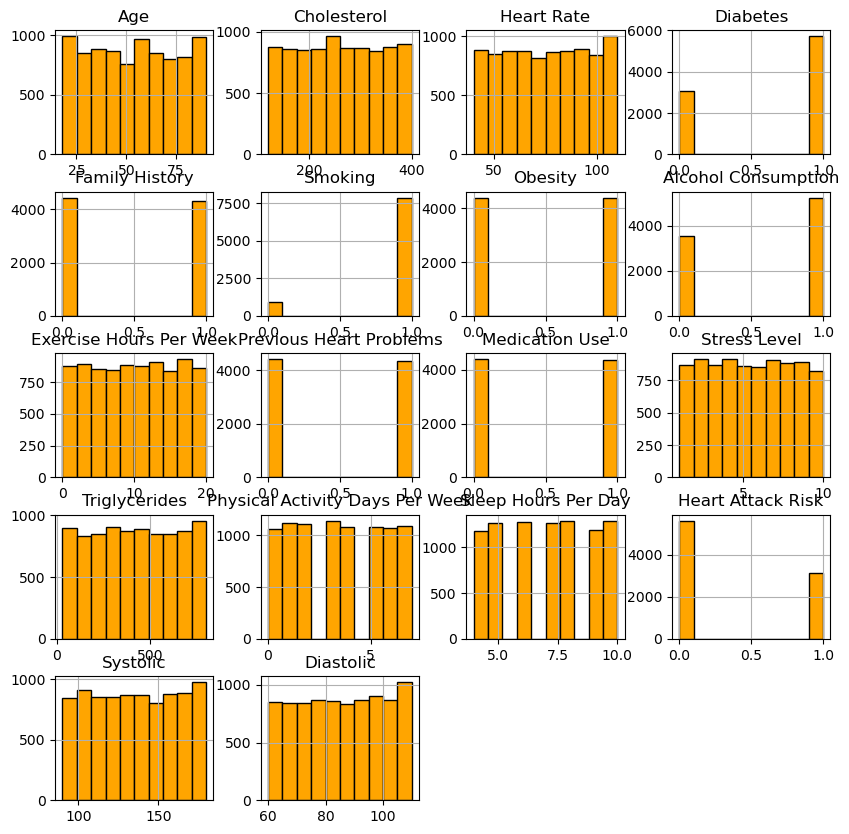

<Figure size 1500x1200 with 0 Axes>

In [26]:
# Histogram for numerical columns
data.hist(bins=10, figsize=(10, 10), color='orange', edgecolor='black')
plt.figure(figsize=(15, 12))
plt.suptitle("Histograms of Health Parameters")
plt.tight_layout()
plt.show()



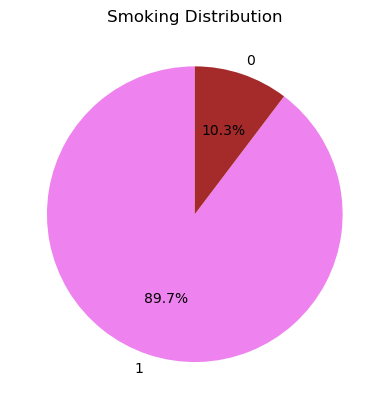

In [27]:
# Pie Chart for Smoker Status

column = 'Smoking'
counts = data[column].value_counts()

# Create the pie chart
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['violet', 'brown'])
plt.title(f'{column} Distribution')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

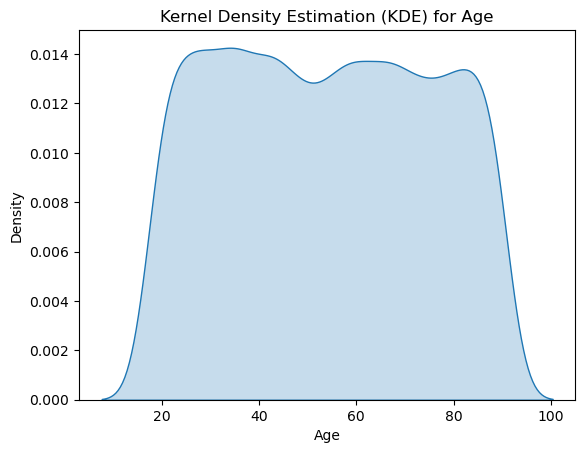

In [28]:
# Age Distribution with KDE
sns.kdeplot(data['Age'], fill=True)
plt.title('Kernel Density Estimation (KDE) for Age')
plt.show()

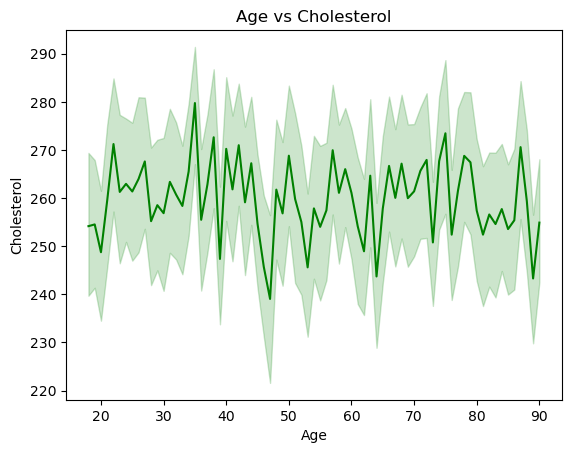

In [29]:
# Line plot  for 'Age' vs. 'Cholesterol'
sns.lineplot(x=data['Age'], y=data['Cholesterol'], color='green')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


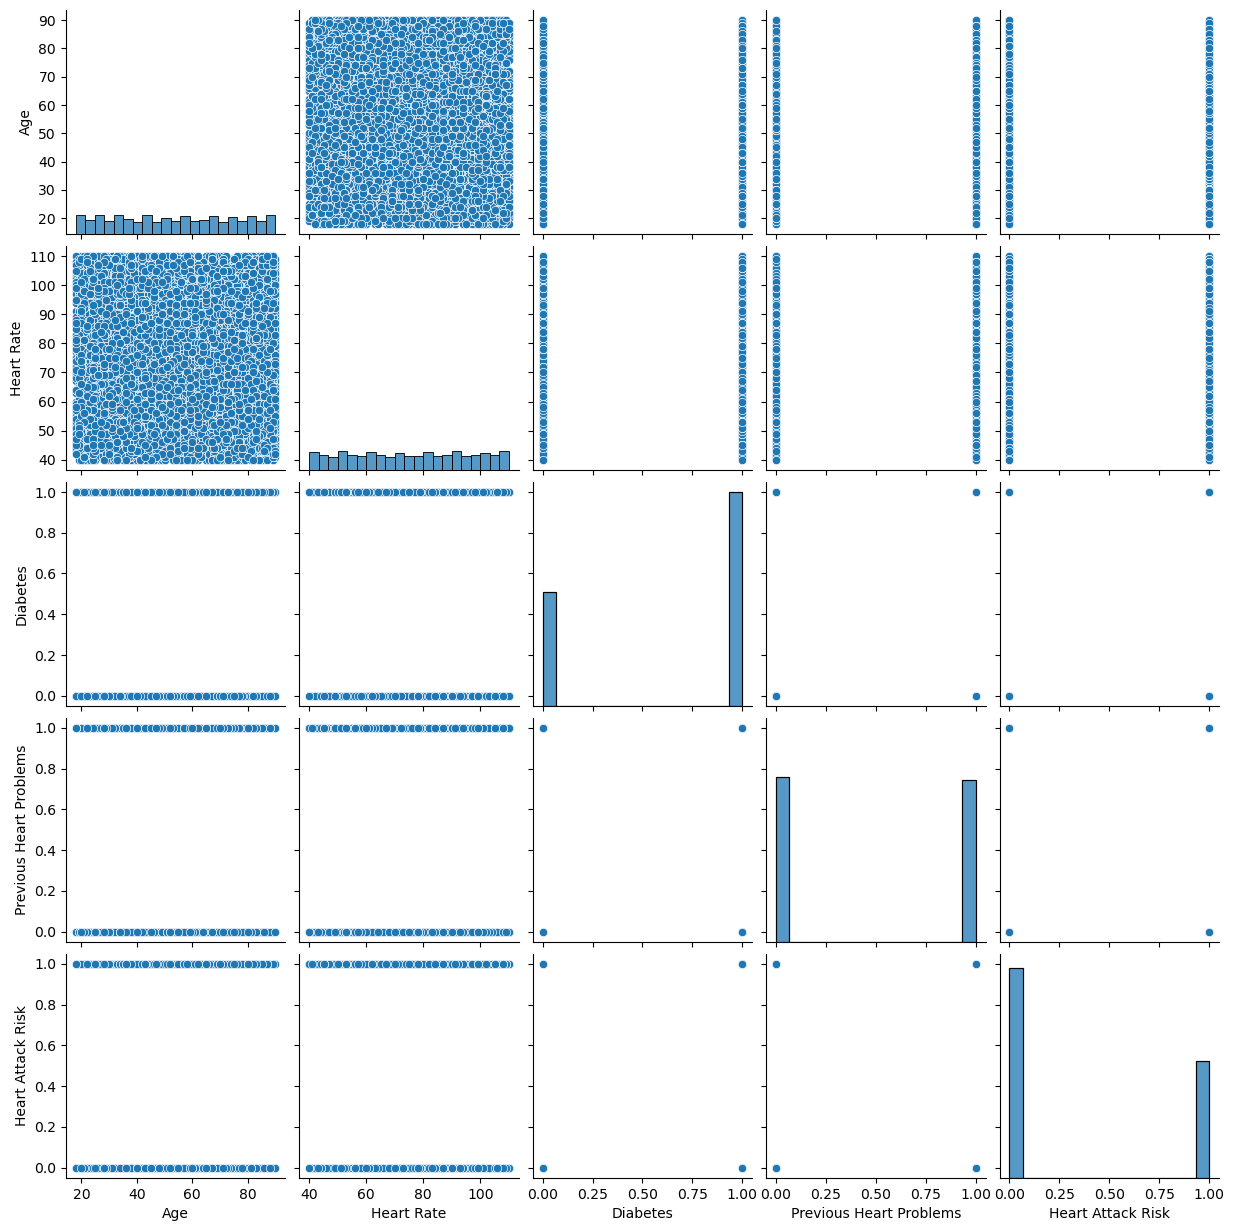

In [30]:
# Pair plot for relationship b/w various columns
sns.pairplot(data[['Age', 'Heart Rate', 'Diabetes', 'Previous Heart Problems', 'Heart Attack Risk']])

# Show the plot
plt.show()

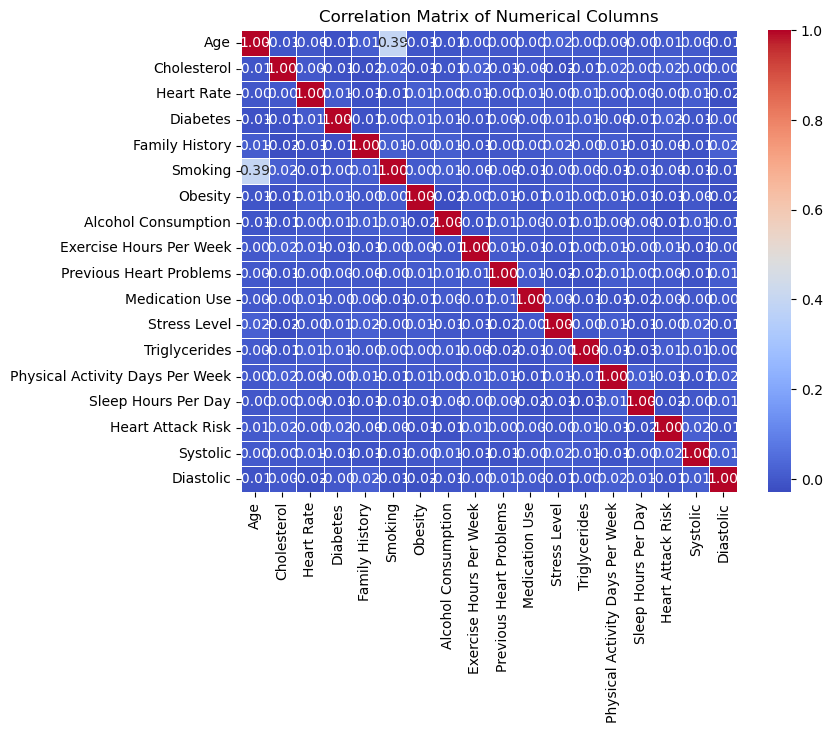

In [31]:
# Correlation heatmap to visualize relationships between numerical columns
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

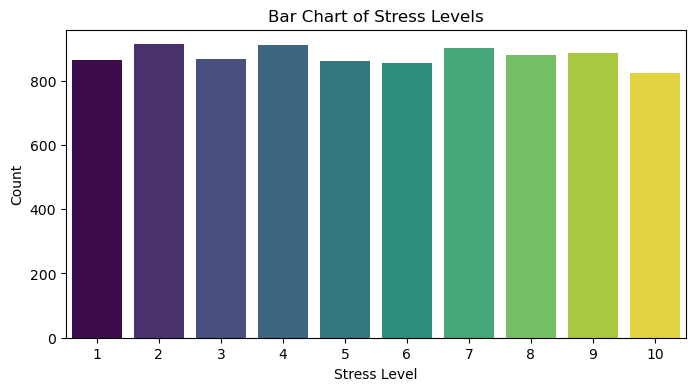

In [32]:
# Bar plot for Stress Level

plt.figure(figsize=(8, 4))
sns.countplot(x='Stress Level', data=data, hue='Stress Level', palette='viridis', legend=False)
plt.title('Bar Chart of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**EDA involved generating statistical summaries and visualizations like histograms, pie charts, bar plots, and boxplots, heatmap to understand feature distributions and relationships**

**<u>Outputs Observed<u>**

Histograms highlighted distributions between numerical values.

Correlation heatmap showed relationships between numerical variables, identifying strong correlations for feature selection.

Pie chart revelaed the distribution of smokeing status

Bar plots revealed stress levels

-----------

## Feature Engineering

In [36]:
# Select categorical columns (object type)
categorical_columns = data.select_dtypes(include=['object']).columns

# Display the categorical columns
print(categorical_columns)

Index(['Sex', 'Diet'], dtype='object')


In [37]:
# Apply one-hot encoding only to the other categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verify columns
print(data.columns)

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk', 'Systolic', 'Diastolic',
       'Sex_Male', 'Diet_Healthy', 'Diet_Unhealthy'],
      dtype='object')


In [38]:
# Outliers

# Function to find outliers using IQR method

def find_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    return outliers

# Find outliers for all numerical columns
outliers = find_outliers_iqr(data, numerical_columns)

# Display outliers count for each column
print("Outliers in each numerical column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

Outliers in each numerical column:
Age: 0 outliers
Cholesterol: 0 outliers
Heart Rate: 0 outliers
Diabetes: 0 outliers
Family History: 0 outliers
Smoking: 904 outliers
Obesity: 0 outliers
Alcohol Consumption: 0 outliers
Exercise Hours Per Week: 0 outliers
Previous Heart Problems: 0 outliers
Medication Use: 0 outliers
Stress Level: 0 outliers
Triglycerides: 0 outliers
Physical Activity Days Per Week: 0 outliers
Sleep Hours Per Day: 0 outliers
Heart Attack Risk: 0 outliers
Systolic: 0 outliers
Diastolic: 0 outliers


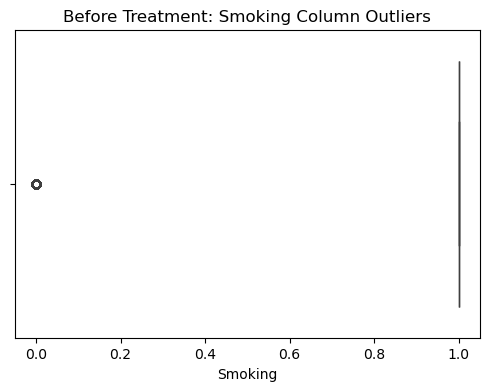

In [39]:
# Visualize outliers using boxplots
# Boxplot before treatment
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Smoking'])
plt.title('Before Treatment: Smoking Column Outliers')
plt.show()


In [40]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df



In [41]:
# Remove outliers from the dataset
cleaned_data = remove_outliers_iqr(data, numerical_columns)

# Check the shape of the cleaned data
print(f"Shape of data after removing outliers: {cleaned_data.shape}")

Shape of data after removing outliers: (7859, 21)


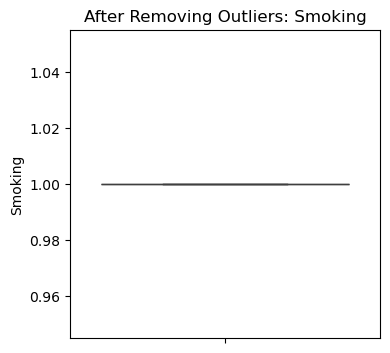

In [42]:
# Boxplot after removing outliers
plt.figure(figsize=(4, 4))
sns.boxplot(data=cleaned_data['Smoking'])
plt.title('After Removing Outliers: Smoking')
plt.show()

In [43]:
# Check the skewness of all numerical columns
skewness = cleaned_data[numerical_columns].skew()
print("Skewness of Numerical olumns:")
print(skewness)

Skewness of Numerical olumns:
Age                               -0.138251
Cholesterol                       -0.012554
Heart Rate                         0.001106
Diabetes                          -0.640054
Family History                     0.020109
Smoking                            0.000000
Obesity                           -0.008400
Alcohol Consumption               -0.409192
Exercise Hours Per Week           -0.017805
Previous Heart Problems            0.017054
Medication Use                     0.014000
Stress Level                       0.005736
Triglycerides                     -0.007371
Physical Activity Days Per Week    0.022262
Sleep Hours Per Day                0.004879
Heart Attack Risk                  0.594540
Systolic                           0.001466
Diastolic                         -0.020278
dtype: float64


In [44]:
# Apply log transformation to 'Diabetes' and 'Alcohol Consumption' and square root to 'Heart Attack Risk'

# Checking for the existence of values greater than zero
if (cleaned_data['Diabetes'] > 0).all():  # Check if all values are positive for log transformation
    cleaned_data['Diabetes'] = np.log(cleaned_data['Diabetes'])

if (cleaned_data['Alcohol Consumption'] > 0).all():  # Check if all values are positive for log transformation
    cleaned_data['Alcohol Consumption'] = np.log(cleaned_data['Alcohol Consumption'])

if (cleaned_data['Heart Attack Risk'] >= 0).all():  # Ensure no negative values for square root transformation
    cleaned_data['Heart Attack Risk'] = np.sqrt(cleaned_data['Heart Attack Risk'])


In [45]:
# Check skewness of the columns
from scipy.stats import skew

skewed_columns = ['Diabetes', 'Alcohol Consumption', 'Heart Attack Risk']
for column in skewed_columns:
    print(f"Skewness of {column}: {skew(cleaned_data[column].dropna())}")

Skewness of Diabetes: -0.6399315340536336
Skewness of Alcohol Consumption: -0.40911417730202715
Skewness of Heart Attack Risk: 0.5944266175806808


**Derived variables were created, and categorical features were encoded to enhance model training.**

**<u>Outputs Observed<u>**
  
The column preview showed encoded variables ready for modeling.

Outliers and skewness were handled.

Feature engineering improved the dataset's relevance and predictive power for machine learning models.

---------------------

## Feature Selection

In [49]:
# Seperate features (x) and target (y)
a = cleaned_data.drop(columns=['Heart Attack Risk'])
b = cleaned_data['Heart Attack Risk']



In [50]:
# Handle imbalanced data using SMOTE

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(a, b)

In [51]:
# Train Random Forest Classifier for feature selection
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x, y)

RandomForestClassifier(random_state=42)

In [52]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})


In [53]:
# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print sorted features and their importance
print("Feature Importance (Sorted):")
print(feature_importance_df)

Feature Importance (Sorted):
                            Feature  Importance
12                    Triglycerides    0.101025
8           Exercise Hours Per Week    0.099681
1                       Cholesterol    0.098272
0                               Age    0.091124
15                         Systolic    0.090137
2                        Heart Rate    0.089730
16                        Diastolic    0.088014
11                     Stress Level    0.061313
14              Sleep Hours Per Day    0.055429
13  Physical Activity Days Per Week    0.054955
18                     Diet_Healthy    0.022487
19                   Diet_Unhealthy    0.022468
6                           Obesity    0.018986
4                    Family History    0.018927
10                   Medication Use    0.018469
9           Previous Heart Problems    0.018364
7               Alcohol Consumption    0.017585
3                          Diabetes    0.016635
17                         Sex_Male    0.016401
5          

In [54]:
# Set a threshold for removing features
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

In [55]:
# Filter the dataset to include only the important features
x_New = x[important_features]

# Display the selected features
print("\nSelected Features after Removing Irrelevant/Redundant Features:")
print(x_New)


Selected Features after Removing Irrelevant/Redundant Features:
       Triglycerides  Exercise Hours Per Week  Cholesterol  Age  Systolic  \
0                286                 4.168189          208   67       158   
1                235                 1.813242          389   21       165   
2                378                 9.828130          383   84       163   
3                231                 5.804299          318   66        91   
4                795                 0.625008          297   54       172   
...              ...                      ...          ...  ...       ...   
10093            285                 1.284769          149   80       153   
10094            712                10.938743          188   44       144   
10095             62                15.378568          323   62       173   
10096            434                 2.008326          287   71       112   
10097            763                16.948973          203   64       173   

       Hea

**A Random Forest Classifier was trained on the dataset, which was split into training and testing sets.**

**Based on the sorted importance scores, the most important features were selected for further use in the model.**

**<u>Outputs Observed<u>**

These features were selected because they had the highest importance scores, indicating they contribute most to the model’s predictive power.

The model will now be trained using only the selected features, leading to faster training times and potentially better generalization

------------------------

## Split Data into Training and Testing Sets

In [59]:
# split into Train and Test Sets

x_train, x_test, y_train, y_test = train_test_split(x_New, y, test_size=0.2, random_state=42)

**The dataset was divided into two parts: features (x) and Target (y)**

**<u>Outputs Observed<u>**

This ensured  that the features (X) and target (Y) are prepared separately for the model training, allowing the model to learn from the features to predict the target variable.

After applying SMOTE, the data was balanced, reducing the risk of model bias toward the majority class.

The 80/20 split ensures that the model is trained sufficiently while still being validated on a separate, unseen subset of data.

--------------

## Feature Scaling 

In [63]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [64]:
print("Training set shape (features):", x_train_scaled.shape) 
print("Test set shape (features):", x_test_scaled.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (8078, 19)
Test set shape (features): (2020, 19)
Training set shape (target): (8078,)
Test set shape (target): (2020,)


**The StandardScaler was applied to scale the selected features (Now each feature has a mean of 0 and a standard deviation of 1)**

**The training data was fitted and scaled using scaler.fit_transform(), which calculates the mean and standard deviation of the training set**

**<u>Outputs Observed<u>**

This ensures that the model is not biased toward any particular feature due to differing scales.

Feature scaling leads to faster convergence during model training and ensures that the model treats all features equally, enhancing its ability to learn effectively.

------------

## Model Building

In [68]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classification': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5), 
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'), 
    'Naive Bayes': GaussianNB()
}


In [69]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training and Evaluating Model: {name}")
    print("-" * 50)

    # Fit the model
    model.fit(x_train_scaled, y_train)   
    
    # Make predictions
    y_pred = model.predict(x_test_scaled)

    # Metrics Calculation
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)  # Handle undefined precision
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)  # Handle undefined recall
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    results[name] = {
        "Confusion Matrix": conf_matrix,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
    }



Training and Evaluating Model: Logistic Regression
--------------------------------------------------
Training and Evaluating Model: Decision Tree
--------------------------------------------------
Training and Evaluating Model: Random Forest
--------------------------------------------------
Training and Evaluating Model: Gradient Boosting
--------------------------------------------------
Training and Evaluating Model: Support Vector Classification
--------------------------------------------------
Training and Evaluating Model: K-Nearest Neighbors
--------------------------------------------------
Training and Evaluating Model: XGBoost
--------------------------------------------------
Training and Evaluating Model: AdaBoost
--------------------------------------------------
Training and Evaluating Model: Naive Bayes
--------------------------------------------------


In [70]:
#Print Results

for model_name, metrics in results.items():
    print(f"{model_name}:\n")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}\n")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print("-" * 50 ,"\n")

Logistic Regression:

  Confusion Matrix:
[[643 378]
 [364 635]]

  Accuracy: 0.6327
  Precision: 0.6328
  Recall: 0.6327
  F1-Score: 0.6327
-------------------------------------------------- 

Decision Tree:

  Confusion Matrix:
[[557 464]
 [384 615]]

  Accuracy: 0.5802
  Precision: 0.5811
  Recall: 0.5802
  F1-Score: 0.5797
-------------------------------------------------- 

Random Forest:

  Confusion Matrix:
[[780 241]
 [404 595]]

  Accuracy: 0.6807
  Precision: 0.6850
  Recall: 0.6807
  F1-Score: 0.6783
-------------------------------------------------- 

Gradient Boosting:

  Confusion Matrix:
[[715 306]
 [424 575]]

  Accuracy: 0.6386
  Precision: 0.6401
  Recall: 0.6386
  F1-Score: 0.6371
-------------------------------------------------- 

Support Vector Classification:

  Confusion Matrix:
[[800 221]
 [474 525]]

  Accuracy: 0.6559
  Precision: 0.6654
  Recall: 0.6559
  F1-Score: 0.6500
-------------------------------------------------- 

K-Nearest Neighbors:

  Confusion 

**Several models were initialized for evaluation**
**Each model was trained on the scaled training data and predictions were made on the scaled test data**

**<u>Outputs Observed<u>**

The results compares the performance across different models, helping identify which model is most effective for the task.

A detailed analysis of these metrics helped determine that the model is more focused on accuracy. 

Storing results allows easy comparison of model performance and helps identify the best-performing model based on multiple metrics.

In [72]:
def find_best_model_by_accuracy(evaluation_results):
    best_model = None
    best_accuracy = float('-inf')

    print("Model Performance (Accuracy only):\n")
    for model_name, metrics in evaluation_results.items():
        accuracy = metrics['Accuracy']
        print(f"{model_name}: Accuracy = {accuracy:.4f}")
        
        # Update the best model based on accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name

    print(f"\nBest Model based on Accuracy: {best_model} with Accuracy = {best_accuracy:.4f}")
    return best_model


# Call the function to find the best model based on Accuracy
best_model = find_best_model_by_accuracy(results)


Model Performance (Accuracy only):

Logistic Regression: Accuracy = 0.6327
Decision Tree: Accuracy = 0.5802
Random Forest: Accuracy = 0.6807
Gradient Boosting: Accuracy = 0.6386
Support Vector Classification: Accuracy = 0.6559
K-Nearest Neighbors: Accuracy = 0.6292
XGBoost: Accuracy = 0.6312
AdaBoost: Accuracy = 0.6302
Naive Bayes: Accuracy = 0.6248

Best Model based on Accuracy: Random Forest with Accuracy = 0.6807


**A function was defined to identify the best model based on a primary evaluation metric**

**<u>Outputs Observed<u>**

The function successfully identifies and prints the model that achieves the highest accuracy.

Based on the accuracy metric, Random Forest performs the best among the evaluated models with an accuracy of 0.6891


--------------

## Hyperparameter Tunning

In [76]:
# Define the model and parameter grid for Random Forest

rf_model = RandomForestClassifier(random_state=42)
param_distributions = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    random_state=42,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
)

# Fit the RandomizedSearchCV
random_search.fit(x_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy', verbose=1)

In [77]:
# Best parameters and best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

best_params

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': None,
 'bootstrap': True}

In [78]:
# Evaluate 
# Retrain RandomForestClassifier with the correct feature set
best_rf_model.fit(x_train, y_train)

y_test_pred = best_rf_model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

In [79]:
# Print evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.6801980198019802

Confusion Matrix:
 [[785 236]
 [410 589]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.77      0.71      1021
         1.0       0.71      0.59      0.65       999

    accuracy                           0.68      2020
   macro avg       0.69      0.68      0.68      2020
weighted avg       0.69      0.68      0.68      2020



**RandomForestClassifier was defined and RandomizedSearchCV was used to perform hyperparameter tuning.**

**<u>Outputs Observed<u>**

The Random Forest model, after tuning, achieved an accuracy of 0.68, which is an improvement over the initial models.


---------------

## PIPELINE EVALUATION ##

In [83]:
pipeline = Pipeline([
    # Step 1: Feature Selection
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold='mean')),
    
    # Step 2: Feature Scaling
    ('scaling', StandardScaler()),
    
    # Step 3: Model
    ('classification', RandomForestClassifier(random_state=42))  # Model

])

In [84]:
# Train the pipeline on the full training data
pipeline.fit(x_train, y_train)


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                                 threshold='mean')),
                ('scaling', StandardScaler()),
                ('classification', RandomForestClassifier(random_state=42))])

In [85]:
# Train the pipeline on training data
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Pipeline Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Pipeline Accuracy: 0.6589
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.65      0.66      1021
         1.0       0.65      0.66      0.66       999

    accuracy                           0.66      2020
   macro avg       0.66      0.66      0.66      2020
weighted avg       0.66      0.66      0.66      2020



**A Pipeline was created to streamline the entire process, combining scaling and the RandomForestClassifier for model evaluation**

**<u>Outputs Observed<u>**

The pipeline model achieved an accuracy of 66%, which indicates moderate overall performance. 

However, the model shows significant challenges in correctly classifying the minority class.
eeded.

-----------

## Save the Model

In [89]:
# Save the Best Model
import joblib
# Save the pipeline to a file for future use
pipeline_file = "Random_Forest_pipeline.pkl"
joblib.dump(pipeline, pipeline_file)

# Confirm the pipeline was saved
pipeline_file


'Random_Forest_pipeline.pkl'

**The best model was saved to a file using the joblib library**


----------

## Test  with Unseen Data

In [178]:
# Randomly sample 10 rows from the original dataset

unseen_data = data.sample(n=20, random_state=42)

# Separate features and target
X_unseen = unseen_data.drop(columns=['Heart Attack Risk'])  
y_unseen = unseen_data['Heart Attack Risk']

In [180]:
print(x_train.columns)  # Columns used during training
print(X_unseen.columns)  # Columns in unseen

Index(['Triglycerides', 'Exercise Hours Per Week', 'Cholesterol', 'Age',
       'Systolic', 'Heart Rate', 'Diastolic', 'Stress Level',
       'Sleep Hours Per Day', 'Physical Activity Days Per Week',
       'Diet_Healthy', 'Diet_Unhealthy', 'Obesity', 'Family History',
       'Medication Use', 'Previous Heart Problems', 'Alcohol Consumption',
       'Diabetes', 'Sex_Male'],
      dtype='object')
Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Systolic', 'Diastolic', 'Sex_Male',
       'Diet_Healthy', 'Diet_Unhealthy'],
      dtype='object')


In [182]:
X_unseen = X_unseen.drop(columns=['Smoking'], errors='ignore')
X_unseen = X_unseen[x_train.columns]


In [184]:
# Predict using the trained pipeline
y_unseen_pred = pipeline.predict(X_unseen)

# Evaluate the performance on unseen data
accuracy_unseen = accuracy_score(y_unseen, y_unseen_pred)
conf_matrix_unseen = confusion_matrix(y_unseen, y_unseen_pred)
classification_rep_unseen = classification_report(y_unseen, y_unseen_pred)

In [97]:
# Print evaluation results
print(f"Accuracy on unseen data: {accuracy_unseen}")
print("Confusion Matrix on unseen data:")
print(conf_matrix_unseen)
print("Classification Report on unseen data:")
print(classification_rep_unseen)

Accuracy on unseen data: 0.95
Confusion Matrix on unseen data:
[[10  1]
 [ 0  9]]
Classification Report on unseen data:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [186]:
# Load the saved pipeline for future use
loaded_pipeline = joblib.load(pipeline_file)

# Use the loaded pipeline to predict and evaluate unseen data again
y_unseen_pred_loaded = loaded_pipeline.predict(X_unseen)
accuracy_unseen_loaded = accuracy_score(y_unseen, y_unseen_pred_loaded)
print(f"Accuracy from loaded pipeline: {accuracy_unseen_loaded}")

Accuracy from loaded pipeline: 0.95


In [192]:
# Combine features and target into one DataFrame
unseen_data_with_target = X_unseen.copy()  # Create a copy of X_unseen
unseen_data_with_target['Heart Attack Risk'] = y_unseen  # Add the target column

# Save the unseen data to a CSV file
unseen_data_file = "unseen_data.csv"
unseen_data_with_target.to_csv(unseen_data_file, index=False)

# Confirm the file is saved
print(f"Unseen data saved to: {unseen_data_file}")

Unseen data saved to: unseen_data.csv


In [194]:
# Load the saved unseen data
l_unseen_data = pd.read_csv("unseen_data.csv")
l_unseen_data.head(10)

,Triglycerides,Exercise Hours Per Week,Cholesterol,Age,Systolic,Heart Rate,Diastolic,Stress Level,Sleep Hours Per Day,Physical Activity Days Per Week,Diet_Healthy,Diet_Unhealthy,Obesity,Family History,Medication Use,Previous Heart Problems,Alcohol Consumption,Diabetes,Sex_Male,Heart Attack Risk
0,315,9.870784,340,65,124,75,68,7,4,0,True,False,1,0,1,1,1,0,True,0
1,471,2.763339,361,77,177,46,104,5,6,3,True,False,0,0,0,0,0,1,True,1
2,104,16.325463,341,70,156,73,84,6,8,1,True,False,1,1,0,1,1,1,True,1
3,201,5.161941,392,47,155,72,75,8,9,6,False,False,1,1,0,0,0,0,True,1
4,638,3.681472,173,63,103,98,109,1,7,2,False,True,0,0,1,0,1,0,True,0
5,421,10.922625,208,50,154,65,92,8,8,2,True,False,0,0,1,1,1,1,False,1
6,655,10.355514,247,60,154,87,107,7,4,5,False,True,0,0,0,0,1,1,True,1
7,668,7.789933,357,22,102,96,105,8,10,0,True,False,1,0,0,1,1,1,True,0
8,725,13.640251,183,39,97,58,102,7,10,2,False,True,0,0,1,0,1,1,True,0
9,289,17.462896,188,30,168,53,82,8,8,6,True,False,1,1,0,1,1,0,True,1


**A random sample of 10 rows was selected from the original dataset**

**The trained pipeline was used to predict the test results for the unseen data**

**The saved pipeline (Logistic_regression_pipeline.pkl) was loaded using joblib.load() and used to predict the unseen data again.**

**<u>Outputs Observed<u>**

The model performed reasonably well on the small sample of unseen data, achieving 95% accuracy.


Saving unseen data as a CSV file allows for easy access and further use.

------------

In [103]:
# Create a DataFrame to store the comparison
comparison_df = X_unseen.copy()  # Start with features
comparison_df['Actual'] = y_unseen.values  # Add actual values
comparison_df['Predicted'] = y_unseen_pred  # Add predicted values

# Save the comparison to a CSV for review
comparison_file = "unseen_data_comparison.csv"
comparison_df.to_csv(comparison_file, index=False)

# Display the comparison
print("Comparison of Actual vs Predicted values:")
print(comparison_df)

# Confirm the file is saved
print(f"Comparison saved to: {comparison_file}")

Comparison of Actual vs Predicted values:
      Triglycerides  Exercise Hours Per Week  Cholesterol  Age  Systolic  \
1226            315                 9.870784          340   65       124   
7903            471                 2.763339          361   77       177   
1559            104                16.325463          341   70       156   
3621            201                 5.161941          392   47       155   
7552            638                 3.681472          173   63       103   
1467            421                10.922625          208   50       154   
5488            655                10.355514          247   60       154   
222             668                 7.789933          357   22       102   
3317            725                13.640251          183   39        97   
3127            289                17.462896          188   30       168   
6804            485                10.379105          296   19       175   
5712            642                 5.917048  

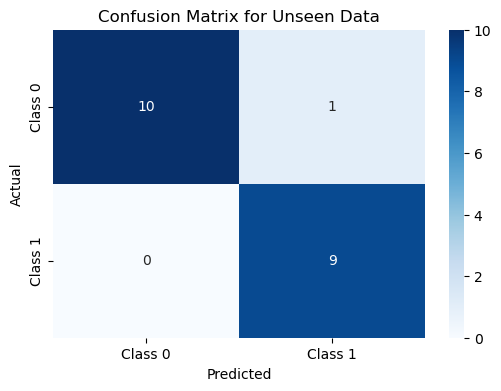

In [104]:
# Generate the confusion matrix
conf_matrix_unseen = confusion_matrix(y_unseen, y_unseen_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_unseen, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Unseen Data')
plt.show()

**A new DataFrame was created to compare the actual and predicted values for the unseen data.**

**A confusion matrix was generated to evaluate the model's performance on the unseen data.**

**<u>Outputs Observed<u>**

This comparison allows you to manually verify the performance of the model on the unseen data.

This plot visually shows how the predicted values align with the actual values for the unseen data, highlighting the model's performance on the given classes.

---------------

## Intrepretation 

In this project, the goal was to develop a model to predict the risk of heart attack based on various health-related features such as age, blood pressure levels, heart rate, and lifestyle factors like exercise and diet. After training a logistic regression model on the dataset, the resulting accuracy was 68%.

While a 68% accuracy indicates that the model is able to correctly predict the risk of heart attack in 68 % of cases, there is still room for improvement. Several factors may contribute to this accuracy level, including the inherent complexity of predicting heart attacks, the quality of the features used, and potential limitations in the dataset. The model’s performance could potentially be enhanced by:

**Feature Engineering:** More relevant features or interactions between existing features could be incorporated to improve the model’s predictive power.

**Model Tuning:** Exploring different machine learning algorithms (e.g., decision trees, random forests, or neural networks) or fine-tuning the hyperparameters of the logistic regression model might lead to better results.

**Data Quality:** Addressing issues like missing or imbalanced data could improve the model's performance. Additionally, expanding the dataset or including more diverse data could help the model generalize better.

**Overall, while the model shows promise with a 68% accuracy, further improvements in feature selection, model choice, and data quality are likely necessary to enhance prediction reliability and make more accurate heart attack risk assessments.**